In [ ]:
#importing Librarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('drive/My Drive/FML Lab/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Creating X and Y values


In [ ]:
x = data.iloc[:,[1,4]].values
x

array([[148,   0],
       [ 85,   0],
       [183,   0],
       ...,
       [121, 112],
       [126,   0],
       [ 93,   0]])

In [ ]:
y = data.iloc[:,7].values
y

Creating Train and Test data


In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)


Creating Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test =  sc.transform(x_test)

Fitting Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
classifier.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([62, 32, 38, 49, 45, 42, 24, 42, 27, 33, 54, 36, 24, 28, 46, 24, 40,
       25, 21, 24, 28, 26, 21, 41, 27, 36, 38, 27, 21, 29, 30, 24, 45, 26,
       24, 34, 29, 28, 26, 25, 23, 22, 26, 41, 31, 21, 33, 41, 32, 54, 37,
       33, 58, 37, 44, 22, 42, 21, 60, 21, 51, 22, 54, 28, 36, 62, 32, 33,
       26, 22, 24, 22, 42, 36, 43, 37, 21, 36, 27, 21, 21, 21, 25, 21, 24,
       28, 29, 24, 36, 39, 36, 29, 37, 24, 43, 29, 21, 58, 23, 21, 21, 24,
       29, 24, 24, 24, 32, 37, 26, 36, 22, 25, 47, 39, 25, 65, 28, 24, 45,
       30, 21, 29, 24, 25, 21, 22, 32, 21, 60, 38, 37, 22, 21, 34, 38, 21,
       24, 29, 22, 22, 22, 42, 22, 41, 24, 22, 22, 21, 21, 28, 22, 47, 32,
       25, 42, 21, 34, 25, 22, 60, 40, 41, 25, 21, 23, 22, 38, 45, 54, 22,
       23, 23, 24, 21, 47, 21, 24, 21, 32, 22, 21, 31, 21, 41, 50, 41, 22,
       36, 24, 23, 24, 21])

Creating Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[3, 4, 2, ..., 0, 0, 0],
       [4, 2, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.metrics import accuracy_score
prediction = accuracy_score(y_test,y_pred)
print("Accuracy:",prediction*100,"%")

Accuracy: 5.208333333333334 %


[Text(0.3513174449906367, 0.9642857142857143, 'x[0] <= -0.526\nentropy = 5.051\nsamples = 576\nvalue = [43, 53, 31, 34, 32, 28, 22, 26, 24, 11, 20, 12\n13, 13, 8, 11, 14, 12, 7, 11, 16, 12, 12, 7\n14, 9, 3, 4, 4, 7, 5, 7, 3, 5, 2, 2, 3, 7\n2, 5, 2, 2, 2, 1, 2, 4, 3, 1, 2, 1, 1, 1]'),
 Text(0.1347436797752809, 0.8928571428571429, 'x[1] <= -0.654\nentropy = 4.29\nsamples = 188\nvalue = [20, 29, 16, 11, 15, 12, 10, 12, 4, 0, 5, 6, 4\n0, 2, 3, 1, 4, 3, 1, 3, 6, 4, 1, 1, 5, 0\n2, 0, 1, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0\n0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0]'),
 Text(0.038974719101123594, 0.8214285714285714, 'x[0] <= -1.157\nentropy = 4.343\nsamples = 82\nvalue = [8, 11, 2, 2, 6, 2, 7, 7, 1, 0, 4, 5, 2, 0\n1, 1, 1, 3, 2, 1, 2, 4, 0, 0, 0, 2, 0, 1\n0, 1, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0\n0, 0, 0, 0, 1, 1, 0, 0, 0, 0]'),
 Text(0.016853932584269662, 0.75, 'x[0] <= -1.552\nentropy = 3.403\nsamples = 24\nvalue = [2, 5, 0, 0, 3, 1, 2, 2, 0, 0, 0, 0, 0, 0\n0, 0, 1, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0\n0, 0,

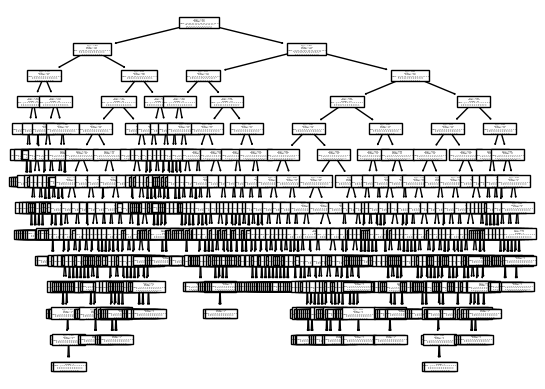

In [ ]:
from sklearn import tree
tree.plot_tree(classifier)

<ipython-input-25-58b0832cd2ae>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j,0],x_set[y_set ==j,1],


<function matplotlib.pyplot.show(close=None, block=None)>

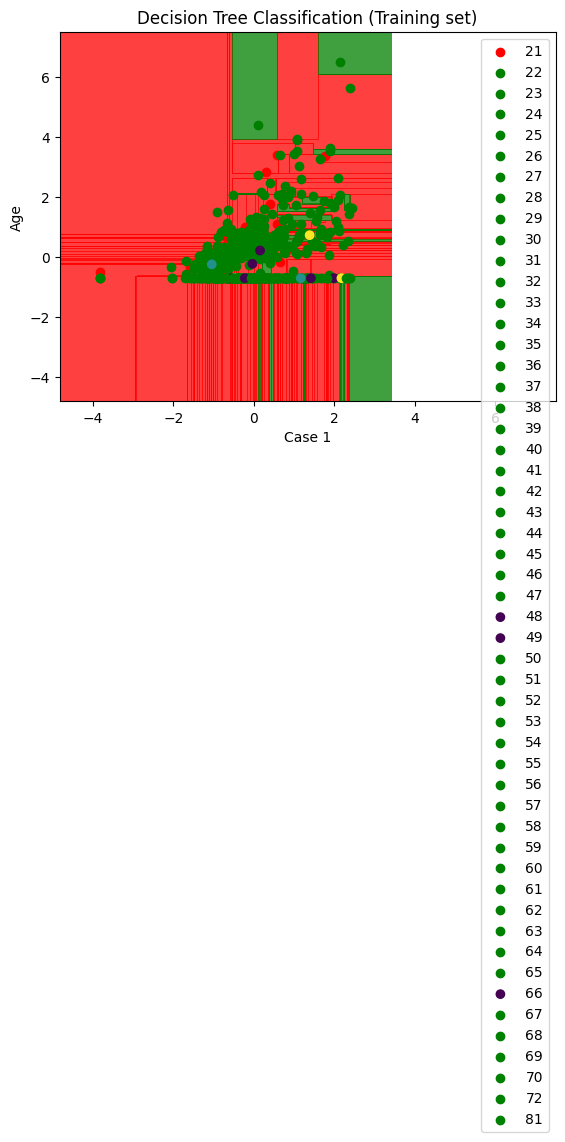

In [ ]:
from matplotlib.colors import ListedColormap
x_set , y_set = x_train , y_train
x1, x2, = np.meshgrid(np.arange(start = x_set[:,0].min()-1,stop = x_set[:,0].max()+1, step = 0.01),
                      np.arange(start = x_set[:,0].min()-1,stop = x_set[:,1].max()+1,step = 0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha = 0.75,cmap = ListedColormap(('red',"green")))
plt.xlim(x1.min(),x1.max())
plt.xlim(x2.min(),x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j,0],x_set[y_set ==j,1],
              c = ListedColormap(('red','green'))(i),label =j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Case 1')
plt.ylabel('Age')
plt.legend()
plt.show